# Importing packages

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the required module for feature selection from scikit-learn
from sklearn.feature_selection import SelectKBest, chi2

# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import joblib

# EDA

In [2]:
# Reading the CSV file 'Human_Resources.csv' and storing it in the variable 'employee_df'

df_original = pd.read_csv('../data/dataset-2.csv')

In [3]:
df_original.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
503,34,No,Travel_Rarely,1397,Research & Development,1,5,Life Sciences,1,683,...,4,80,1,10,4,2,10,9,8,8
1354,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,1907,...,4,80,0,5,3,3,4,2,1,0
518,38,No,Travel_Rarely,243,Sales,7,4,Marketing,1,709,...,1,80,0,8,2,3,7,7,0,5
799,42,No,Travel_Rarely,469,Research & Development,2,2,Medical,1,1109,...,4,80,1,23,3,3,22,6,13,7
1377,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1941,...,4,80,0,28,3,3,5,4,4,3


In [4]:
# Set the display option of the pandas library to show all columns

pd.set_option('display.max_columns', None) 

In [5]:
df_original.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
505,26,No,Travel_Rarely,991,Research & Development,6,3,Life Sciences,1,686,3,Female,71,3,1,Laboratory Technician,4,Married,2659,17759,1,Y,Yes,13,3,3,80,1,3,2,3,3,2,0,2
1264,55,No,Travel_Rarely,478,Research & Development,2,3,Medical,1,1770,3,Male,60,2,5,Research Director,1,Married,19038,19805,8,Y,No,12,3,2,80,3,34,2,3,1,0,0,0
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3
551,39,No,Travel_Rarely,141,Human Resources,3,3,Human Resources,1,760,3,Female,44,4,2,Human Resources,2,Married,6389,18767,9,Y,No,15,3,3,80,1,12,3,1,8,3,3,6
401,56,No,Travel_Frequently,906,Sales,6,3,Life Sciences,1,532,3,Female,86,4,4,Sales Executive,1,Married,13212,18256,9,Y,No,11,3,4,80,3,36,0,2,7,7,7,7


In [6]:
# Make a copy of the original dataframe to work on the copy without affecting the original dataframe. 

df_copy = df_original.copy()

In [7]:
# Use the info() method of the employee_df to display information about the DataFrame

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df_copy.shape

(1470, 35)

***There are 35 features / columns in total, each contains 1470 data points***

In [9]:
# Dsiplay statistical summary of the dataframe 'df_copy'

df_copy.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df_copy.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Check if there is any missing value in the dataset.

df_copy.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

***There is no null values in the dataset***

In [12]:
# Check if there are any duplicate rows in the DataFrame.

df_copy.duplicated().any()

False

***There is no duplicated values in the dataset***

In [13]:
df_copy['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<Axes: xlabel='Attrition'>

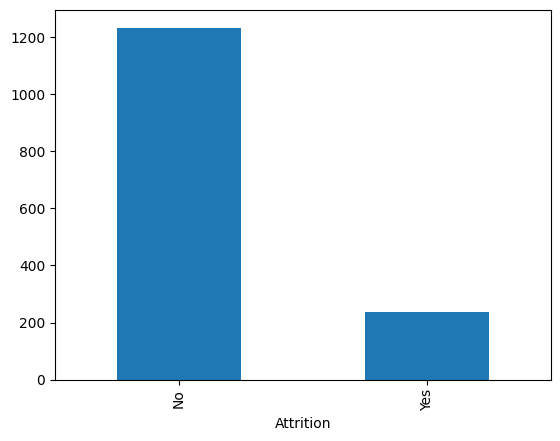

In [14]:
df_copy['Attrition'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

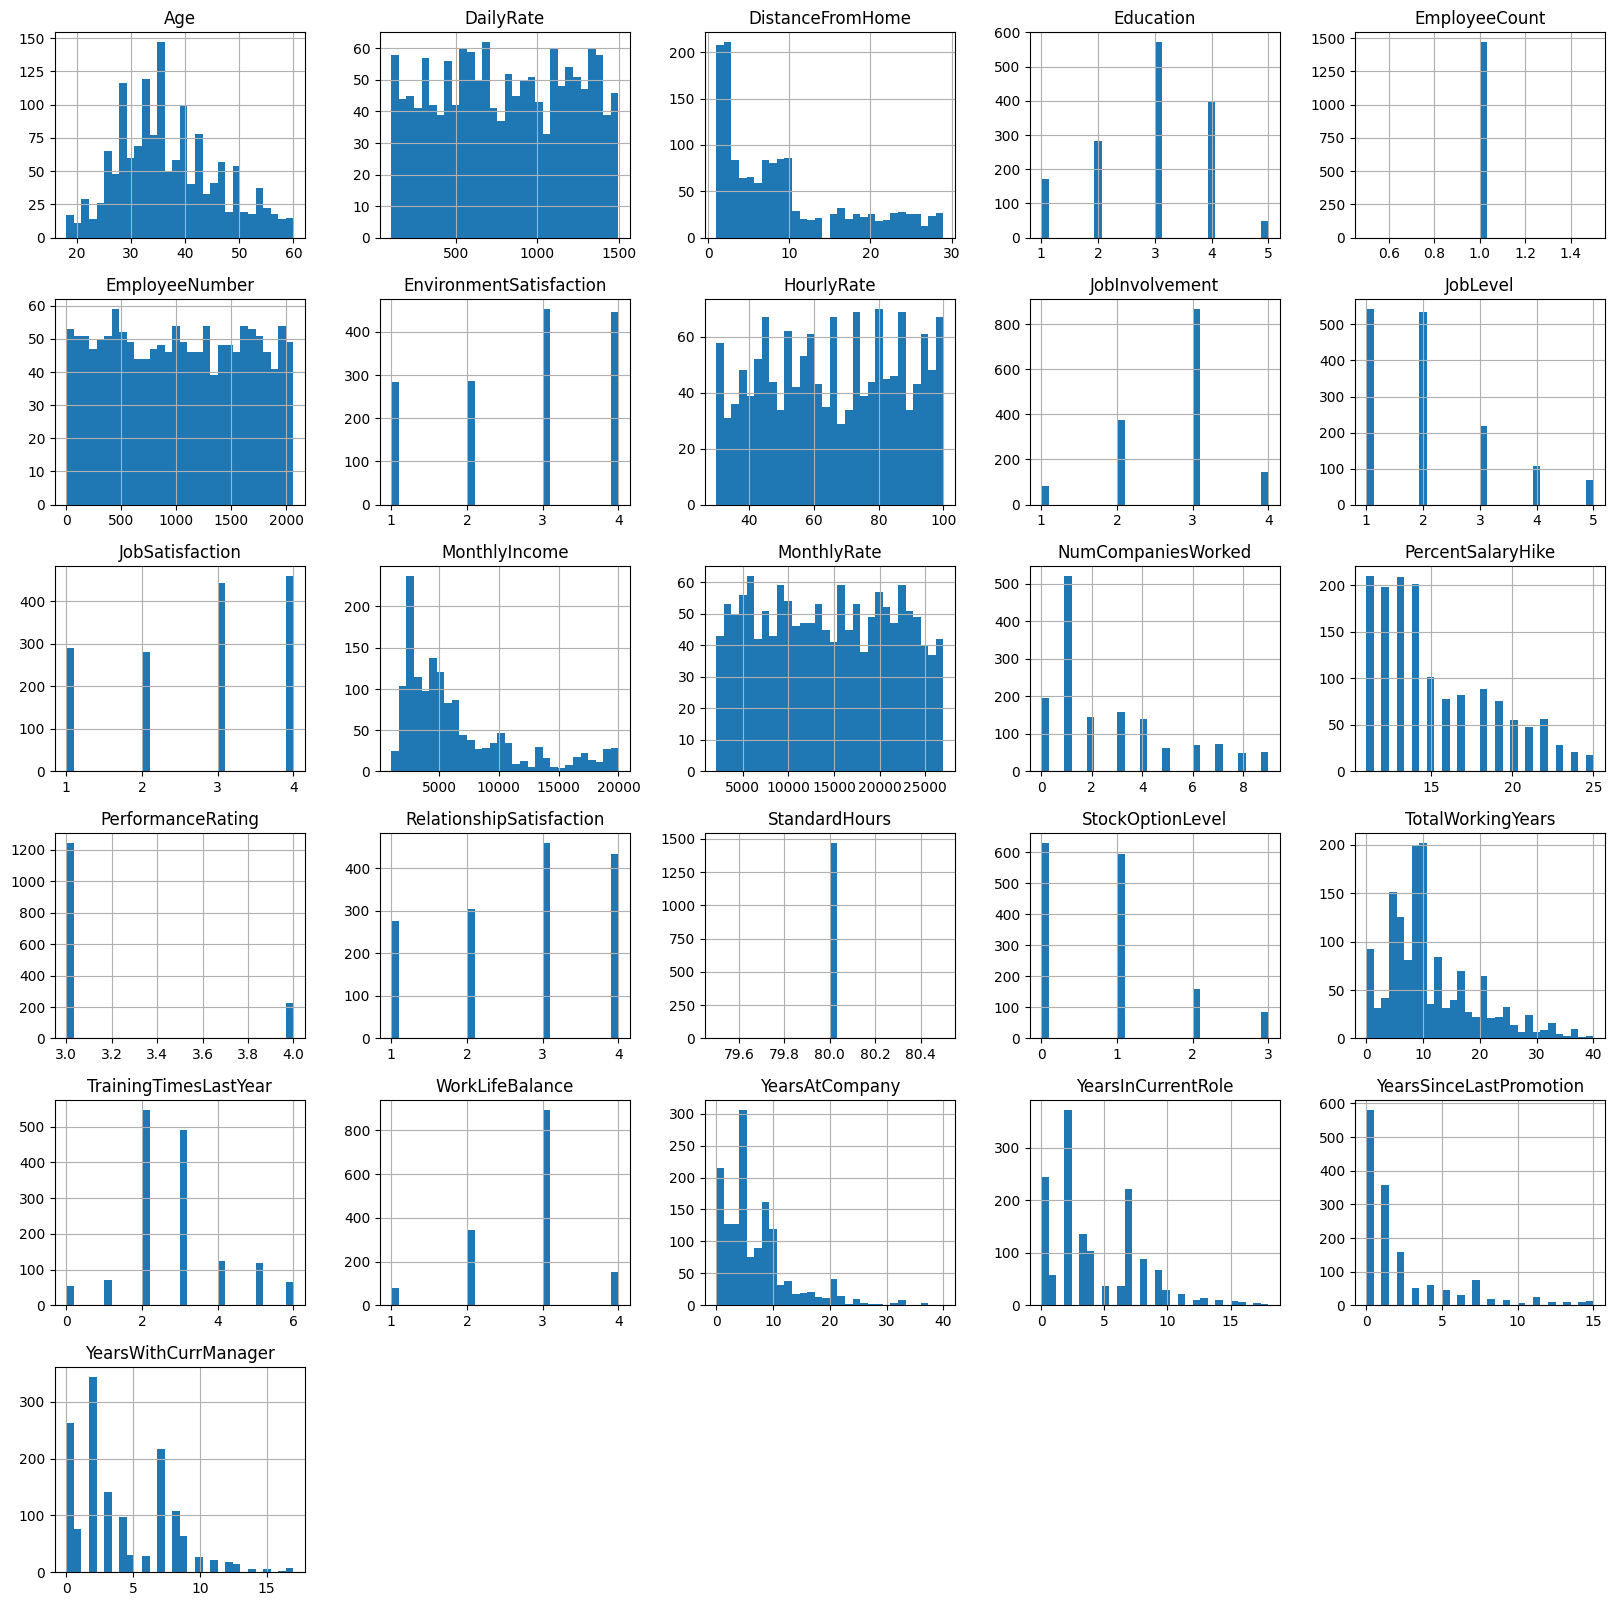

In [15]:
df_copy.hist(bins = 30, figsize = (20,20))

***'EmployeeCount', 'StandardHours', 'Over18' have same values for all the rows. So, we will drop these columns.*** 

In [16]:
df_copy.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

***'EmployeeNumber' has no relation with 'Attrition'. So, we will drop this column as well.***

In [17]:
df_copy.drop(columns=['EmployeeNumber'], inplace=True)

In [18]:
df_copy.shape

(1470, 31)

In [19]:
# Mapping 'Yes' and 'No' values to '1' and '0' respectively for 'Attrition' and 'OverTime'.

df_copy['Attrition'] = df_copy['Attrition'].map({'No': 0, 'Yes': 1})
df_copy['OverTime'] = df_copy['OverTime'].map({'No': 0, 'Yes': 1})

In [20]:
df_copy['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [21]:
df_copy['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [22]:
# Number of employees who left

left_df = df_copy[df_copy['Attrition'] == 1]
len(left_df)

237

In [23]:
# Number of employees who stayed

stayed_df = df_copy[df_copy['Attrition'] == 0]
len(stayed_df)

1233

***There are 237 churned employees and 1233 employees who stayed. It seems like we are dealing with an imbalanced dataset.*** 

In [24]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [25]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


***Let's compare the mean and std values of the employees who stayed and left***
* 'Age': Mean age of the employees who stayed is higher compared to who left
* 'DailyRate': Rate of employees who stayed is higher
* 'DistanceFromHome': Employees who stayed live closer to home
* 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisfied with their jobs
* 'StockOptionLevel': Employees who stayed tend to have higher stock option level

## Correlation heatmap

In [26]:
# Select only the numeric columns from the given DataFrame.

df_numeric = df_copy.select_dtypes(include='number')

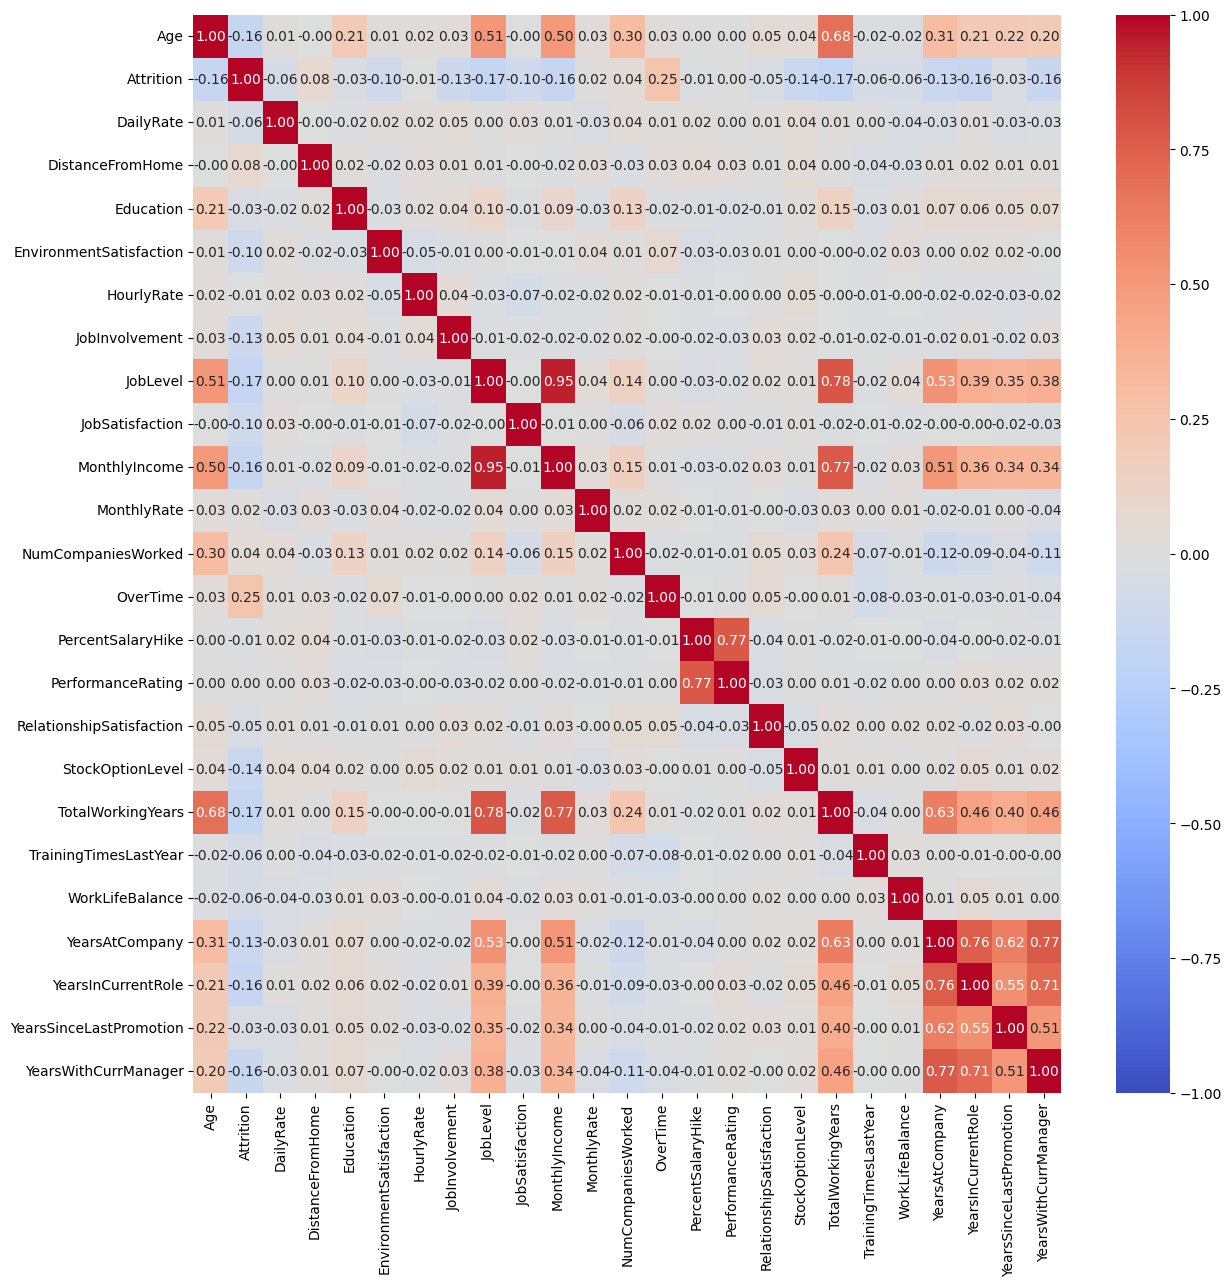

In [27]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

***From the correlation heatmap, we can see that 'Attrition' is negatively correlated with 'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsAtCompany', 'TotalWorkingYears', 'StockOptionLevel', 'MonthlyIncome', 'JobSatisfaction', 'JobLevel', 'JobInvolvement', 'EnvironmentSatisfaction' and 'Age'.***

## Data visualization

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `n

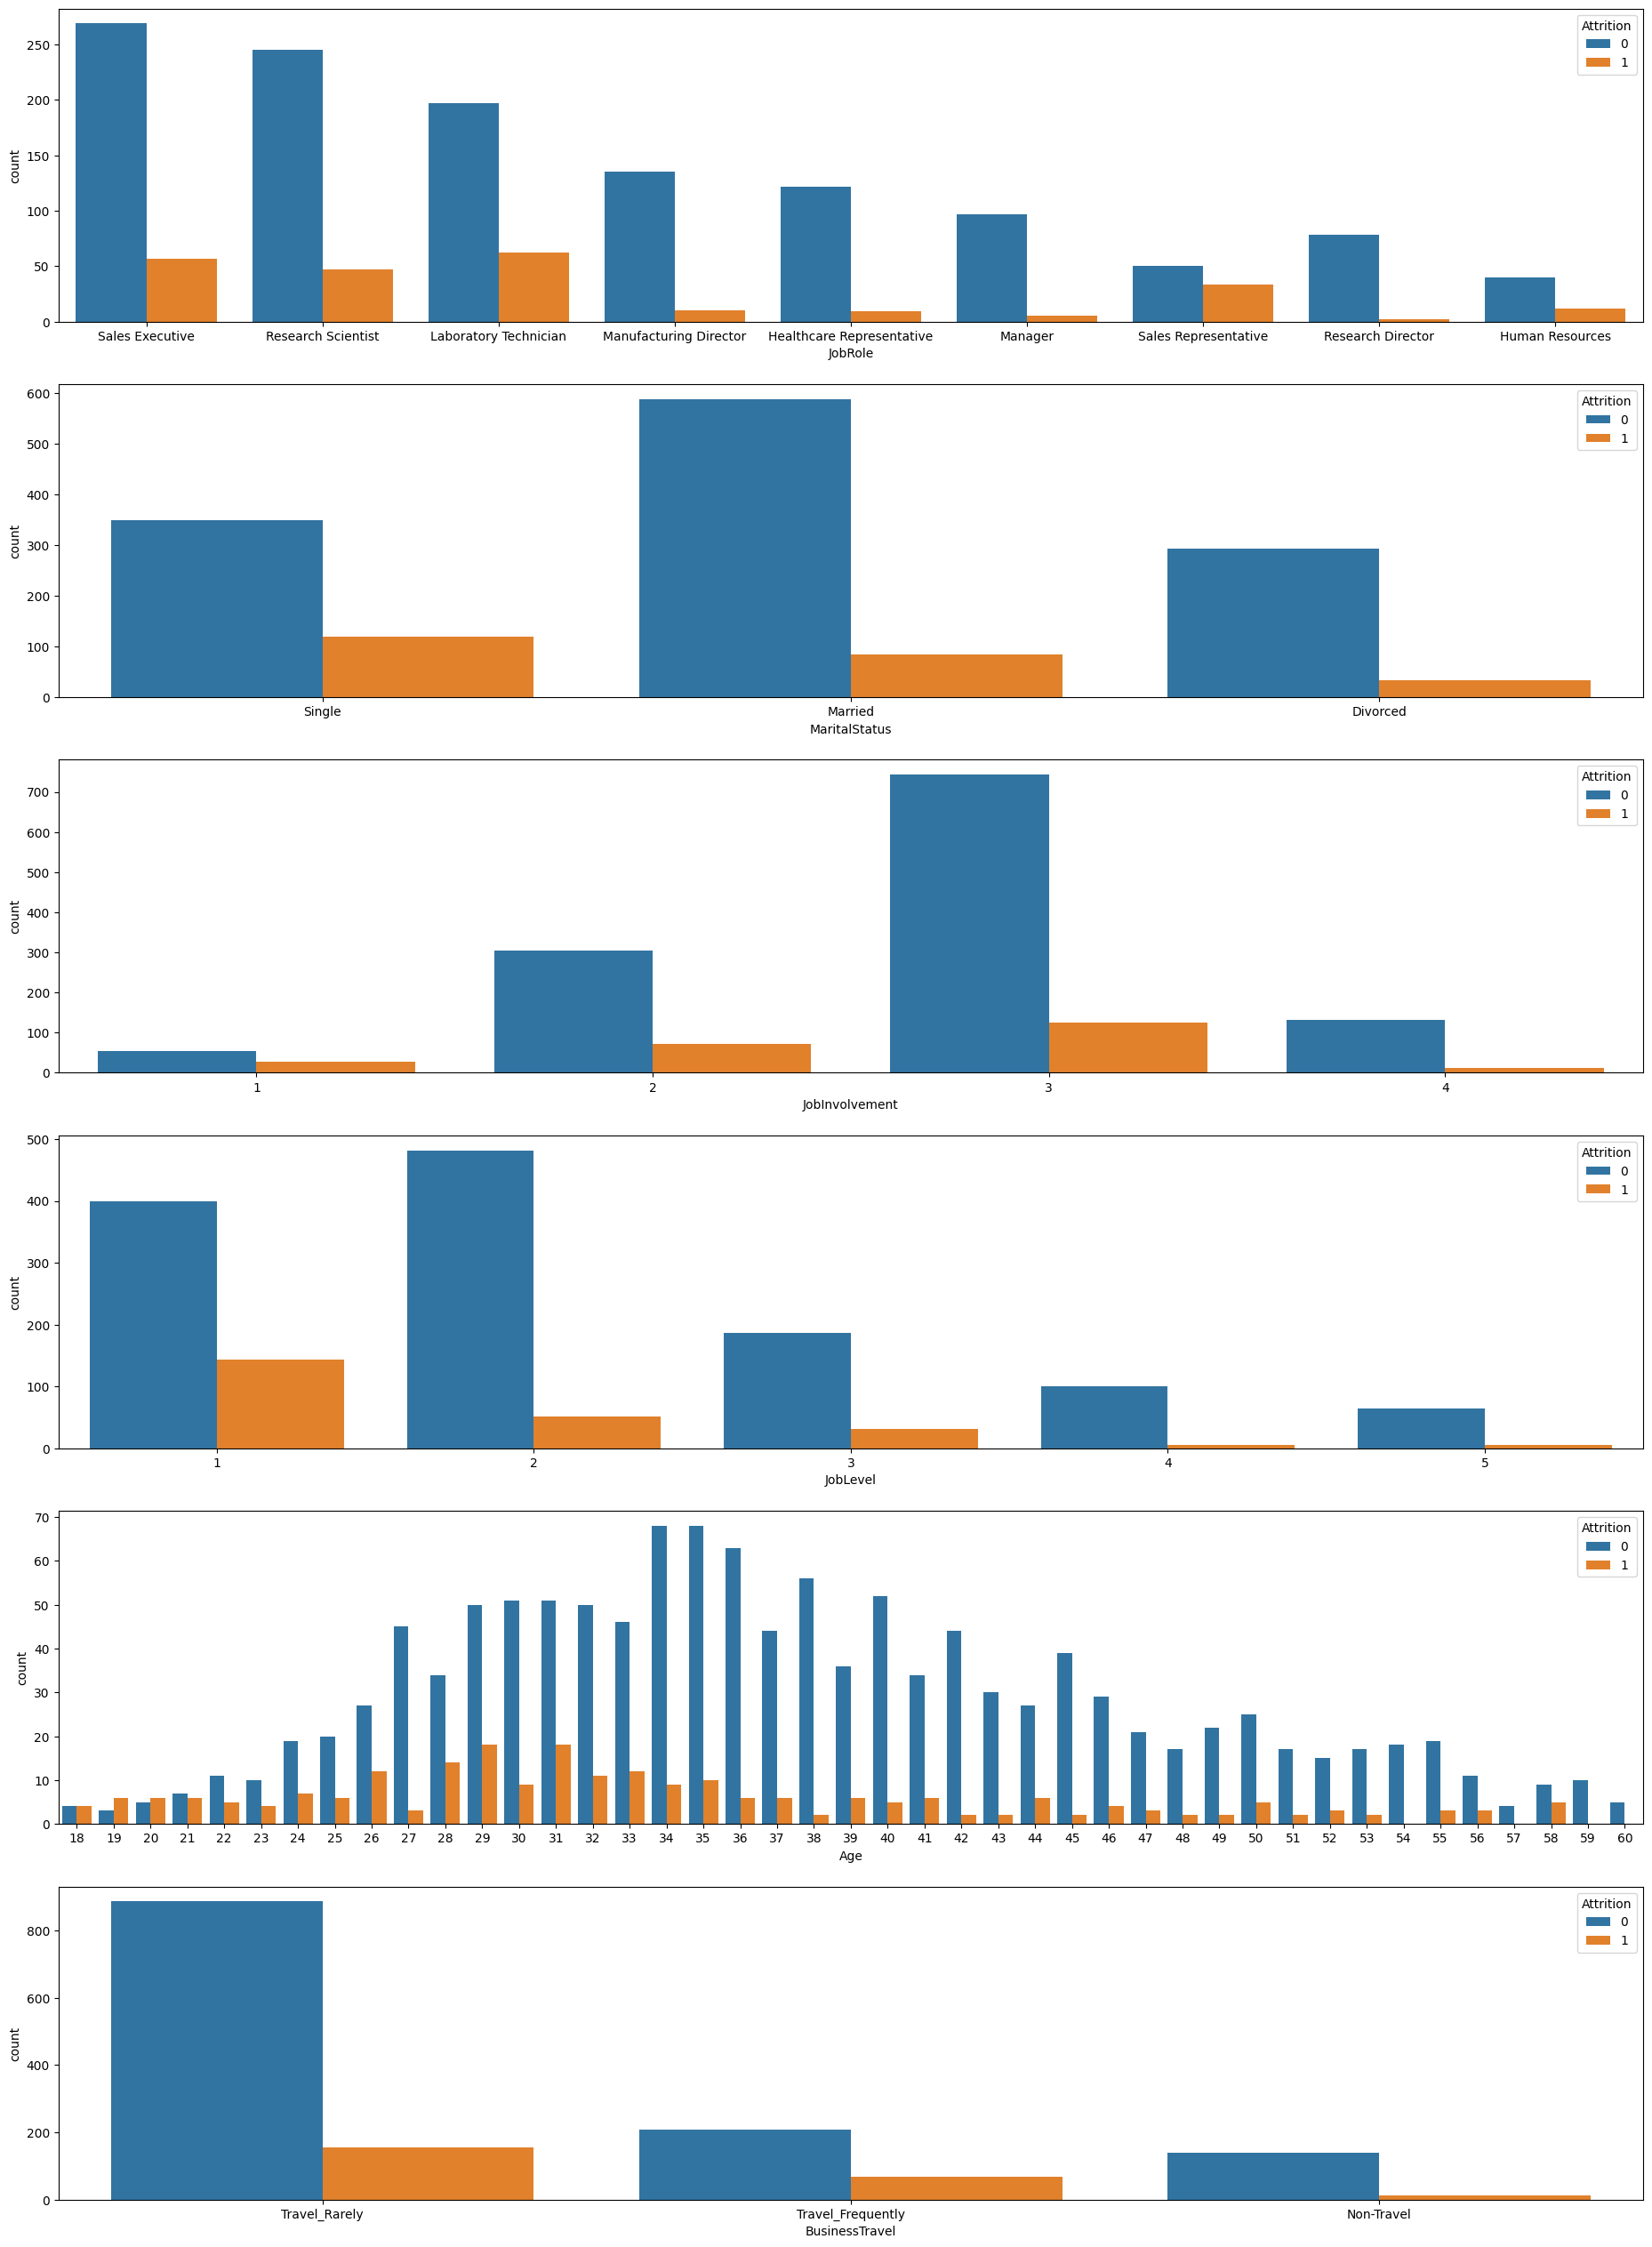

In [28]:
# Set up a figure with a size of 20x20 inches
plt.figure(figsize=[23, 32])

# Create the first subplot (2 rows, 2 columns, 1st subplot)
plt.subplot(611)
# Create a countplot for 'JobRole' with hue 'Attrition' (employee turnover)
# 'x' specifies the variable on the x-axis, 'hue' specifies the variable for color encoding
sns.countplot(x='JobRole', hue='Attrition', data=df_copy);

# Create the second subplot (2 rows, 2 columns, 2nd subplot)
plt.subplot(612)
# Create a countplot for 'MaritalStatus' with hue 'Attrition'
sns.countplot(x='MaritalStatus', hue='Attrition', data=df_copy);

# Create the third subplot (2 rows, 2 columns, 3rd subplot)
plt.subplot(613)
# Create a countplot for 'JobInvolvement' with hue 'Attrition'
sns.countplot(x='JobInvolvement', hue='Attrition', data=df_copy);

# Create the fourth subplot (2 rows, 2 columns, 4th subplot)
plt.subplot(614)
# Create a countplot for 'JobLevel' with hue 'Attrition'
sns.countplot(x='JobLevel', hue='Attrition', data=df_copy);

# Create the fifth subplot (2 rows, 2 columns, 5th subplot)
plt.subplot(615)
# Create a countplot for 'Age' with hue 'Attrition'
sns.countplot(x='Age', hue='Attrition', data=df_copy);

# Create the sixth subplot (2 rows, 2 columns, 6th subplot)
plt.subplot(616)
# Create a countplot for 'BusinessTravel' with hue 'Attrition'
sns.countplot(x='BusinessTravel', hue='Attrition', data=df_copy);

***Let's analyze the count plots***
* Single employees tend to leave compared to married and divorced
* Sales Executives tend leave compared to any other job
* Less involved employees tend to leave the company
* Less experienced (low job level) tend to leave the company

Text(0.5, 0, 'Distance from home')

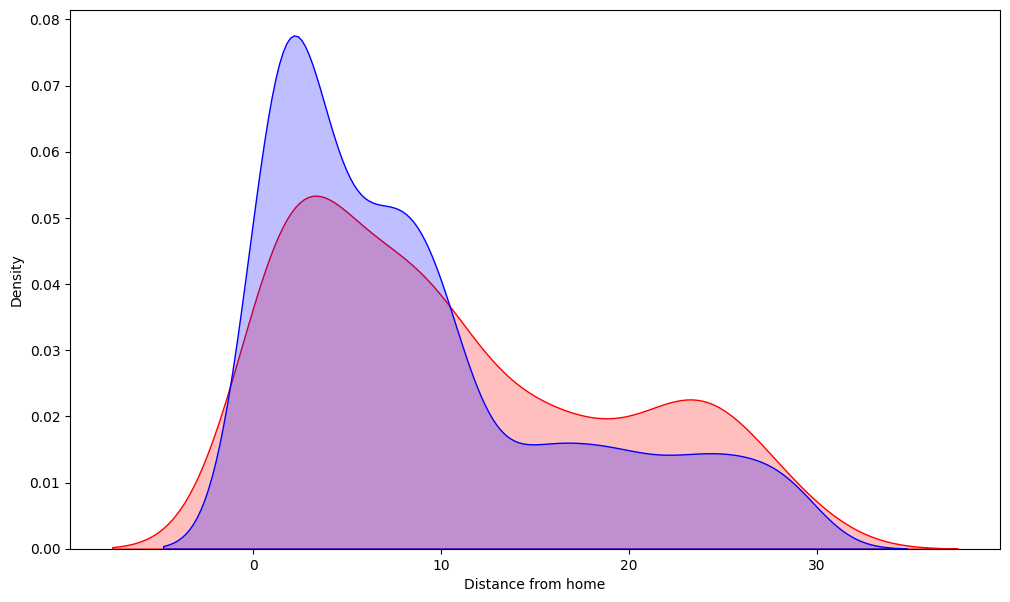

In [29]:
# Set the size of the figure
plt.figure(figsize=[12, 7])

# Plot the kernel density estimation (KDE) plot for the "DistanceFromHome" column of the left_df DataFrame
# Set the label for this plot as "Employee who left"
# Enable filling the area under the KDE curve
# Set the color of the curve as red
sns.kdeplot(left_df['DistanceFromHome'], label='Employee who left', fill=True, color='r')

# Plot the kernel density estimation (KDE) plot for the "YearsWithCurrManager" column of the stayed_df DataFrame
# Set the label for this plot as "Employee who stayed"
# Enable filling the area under the KDE curve
# Set the color of the curve as blue
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employee who stayed', fill=True, color='b')

plt.xlabel('Distance from home')

Text(0.5, 0, 'Years with current manager')

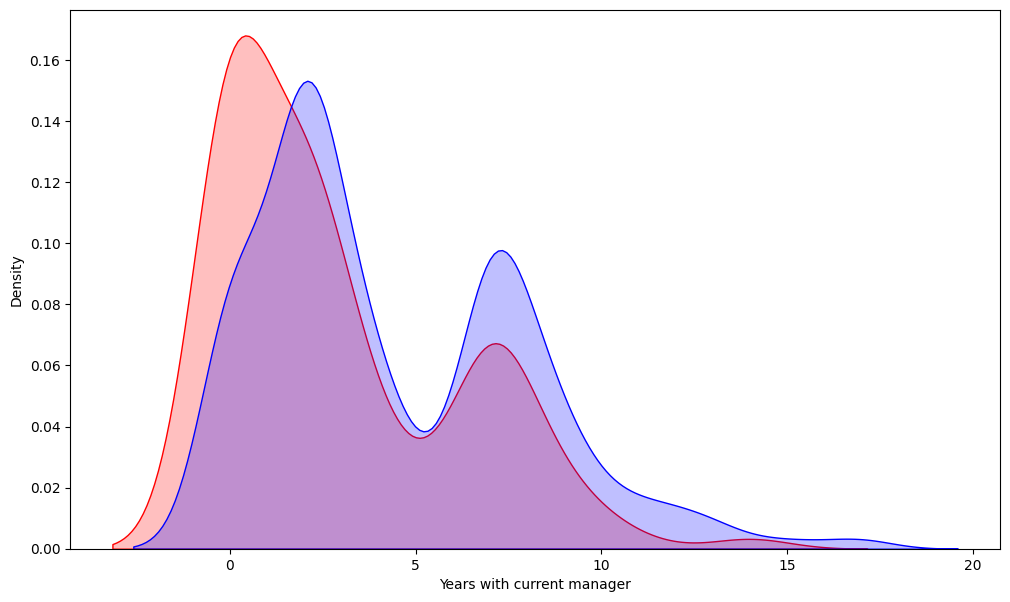

In [30]:
# Set the size of the figure
plt.figure(figsize=[12, 7])

# Plot the kernel density estimation (KDE) plot for the "YearsWithCurrManager" column of the left_df DataFrame
# Set the label for this plot as "Employee who left"
# Enable filling the area under the KDE curve
# Set the color of the curve as red
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employee who left', fill=True, color='r')

# Plot the kernel density estimation (KDE) plot for the "YearsWithCurrManager" column of the stayed_df DataFrame
# Set the label for this plot as "Employee who stayed"
# Enable filling the area under the KDE curve
# Set the color of the curve as blue
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employee who stayed', fill=True, color='b')

# Set the label for the x-axis of the plot
plt.xlabel('Years with current manager')

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


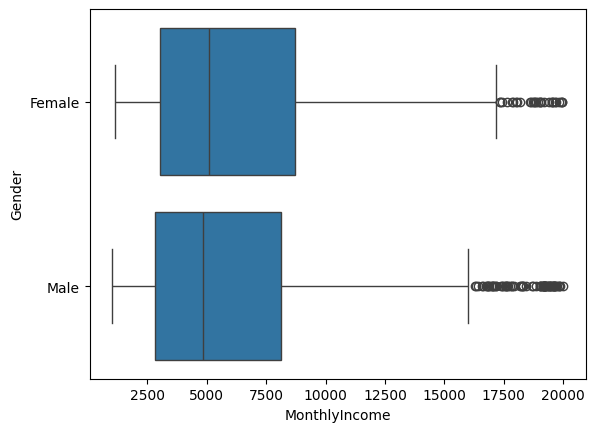

In [31]:
# Let's see the Gender vs. Monthly Income

# Create a boxplot to compare the distribution of 'MonthlyIncome' for each 'Gender'
# 'x' specifies the variable on the x-axis (MonthlyIncome), 'y' specifies the variable on the y-axis (Gender),
sns.boxplot(x='MonthlyIncome', y='Gender', data = df_copy);

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

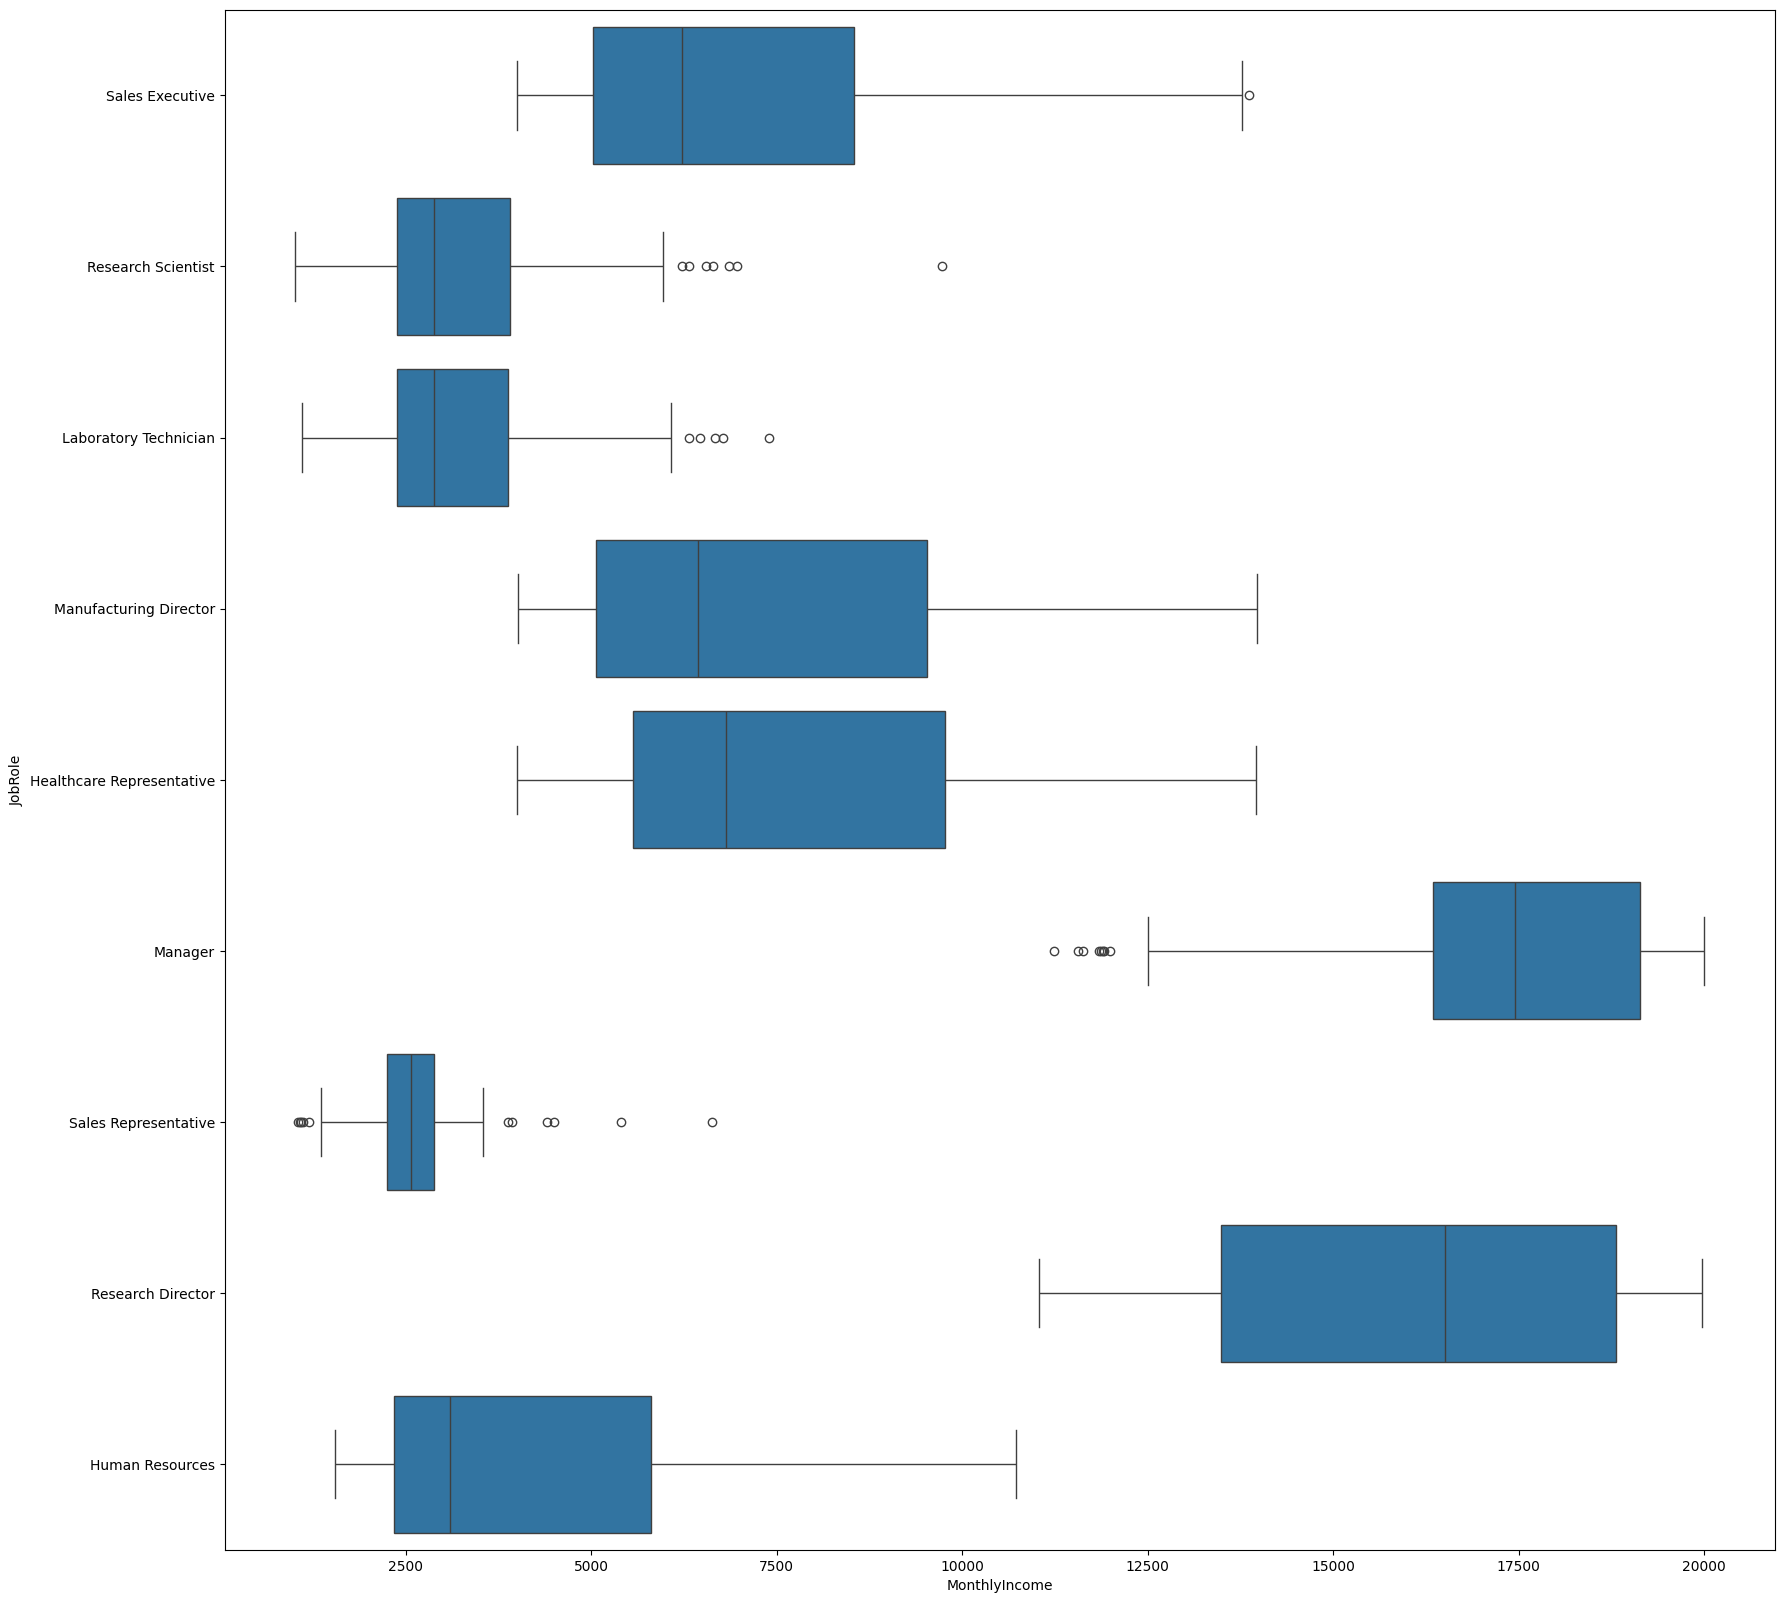

In [32]:
# Let's see the Monthly Income vs. Job Role

# Set the size of the plot figure
plt.figure(figsize=[20, 20])

# Create a boxplot to compare the distribution of 'MonthlyIncome' for each 'JobRole'
# 'x' specifies the variable on the x-axis (MonthlyIncome), 'y' specifies the variable on the y-axis (JobRole),
# and 'data' is the DataFrame containing the data (df_copy)
sns.boxplot(x='MonthlyIncome', y='JobRole', data = df_copy)

# Data preparation

In [33]:
# Select only the numeric columns from the given DataFrame.

df_categorical = df_copy.select_dtypes(include='object')

In [34]:
df_categorical.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [35]:
df_numeric.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
df_numeric.drop(columns=['Attrition'], inplace=True)

In [37]:
df_numeric.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
y = df_copy[['Attrition']]

In [39]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


## Feature selection

### 1. SelectBest method

#### Selecting numerical features

In [40]:
# Create a SelectKBest instance with the chi-squared statistical test as the score function
# Select the top 10 features with the highest scores
# 'df_numeric' represents the input features, and 'y' is the target variable

df_numeric_new = SelectKBest(chi2, k=10).fit(df_numeric, y)

df_numeric_scores = pd.DataFrame(df_numeric_new.scores_)

df_numeric_columns = pd.DataFrame(df_numeric.columns)

feature_scores = pd.concat([df_numeric_columns, df_numeric_scores], axis=1)

feature_scores.columns = ['NUMERICAL FEATURE NAME', 'SCORE']

print(feature_scores.nlargest(10, 'SCORE'))

   NUMERICAL FEATURE NAME          SCORE
9           MonthlyIncome  127922.293694
10            MonthlyRate    1196.633553
1               DailyRate     956.580494
17      TotalWorkingYears     230.721618
20         YearsAtCompany     142.100054
21     YearsInCurrentRole     117.522596
23   YearsWithCurrManager     110.671534
0                     Age      84.155277
12               OverTime      63.845067
2        DistanceFromHome      63.772142


***Top numerical features: 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'*** 

#### Selecting categorical features

In [41]:
df_categorical_encoded = pd.get_dummies(df_categorical)

In [42]:
df_categorical_encoded.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
3,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False


In [43]:
# Create a SelectBest instance with the chi-squared statistical test as the score function
# Select the top 20 features based on the chi-squared test
# 'df_categorical_encoded' represents the input features, and 'y' represents the target variable

df_categorical_new = SelectKBest(chi2, k=20).fit(df_categorical_encoded, y)

df_categorical_scores = pd.DataFrame(df_categorical_new.scores_)

df_categorical_columns = pd.DataFrame(df_categorical_encoded.columns)

feature_scores = pd.concat([df_categorical_columns, df_categorical_scores], axis=1)

feature_scores.columns = ['CATEGORICAL FEATURE NAME', 'SCORE']

print(feature_scores.nlargest(20, 'SCORE'))

             CATEGORICAL FEATURE NAME      SCORE
22       JobRole_Sales Representative  34.290268
25               MaritalStatus_Single  30.771669
1    BusinessTravel_Travel_Frequently  15.816623
16      JobRole_Laboratory Technician  11.699495
19          JobRole_Research Director  10.978010
17                    JobRole_Manager   9.496136
18     JobRole_Manufacturing Director   9.126589
23             MaritalStatus_Divorced   8.794422
14  JobRole_Healthcare Representative   8.292518
0           BusinessTravel_Non-Travel   7.317934
5                    Department_Sales   6.694465
24              MaritalStatus_Married   6.597586
11    EducationField_Technical Degree   6.435860
8            EducationField_Marketing   4.079154
4   Department_Research & Development   3.702916
9              EducationField_Medical   2.222133
6      EducationField_Human Resources   1.918878
15            JobRole_Human Resources   1.859753
2        BusinessTravel_Travel_Rarely   1.047857
7        EducationFi

***Top categorical features: 'JobRole', 'MaritalStatus', 'BusinessTravel', 'Department', 'EducationField'***

#### Creating a new dataset from selected features

In [44]:
df_copy_sb = df_copy[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'JobRole', 'MaritalStatus', 'BusinessTravel', 'Department', 'EducationField']]

### 2. Random Forest method

#### Selecting numerical features

In [45]:
X = df_numeric

In [46]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [47]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({'NUMERICAL FEATURE NAME': X.columns, 'SCORE': importances})

feature_importances = feature_importances.sort_values('SCORE', ascending=False).reset_index(drop=True)

top_10_features = feature_importances.head(10)

print("Top 10 features:\n", top_10_features)

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 10 features:
   NUMERICAL FEATURE NAME     SCORE
0          MonthlyIncome  0.097718
1                    Age  0.070000
2              DailyRate  0.062385
3               OverTime  0.061268
4      TotalWorkingYears  0.060430
5            MonthlyRate  0.059417
6             HourlyRate  0.052922
7       DistanceFromHome  0.050708
8     NumCompaniesWorked  0.045882
9         YearsAtCompany  0.045058


***Top numerical features: 'MonthlyIncome', 'Age', 'OverTime', 'TotalWorkingYears', 'DistanceFromHome'***

#### Selecting categorical features

In [49]:
X = df_categorical_encoded

In [50]:
X.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
3,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False


In [51]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({'CATEGORICAL FEATURE NAME': X.columns, 'SCORE': importances})

feature_importances = feature_importances.sort_values('SCORE', ascending=False).reset_index(drop=True)

top_10_features = feature_importances.head(10)

print("Top 10 features:\n", top_10_features)

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 10 features:
            CATEGORICAL FEATURE NAME     SCORE
0              MaritalStatus_Single  0.081032
1            EducationField_Medical  0.066386
2  BusinessTravel_Travel_Frequently  0.062625
3                       Gender_Male  0.062412
4      EducationField_Life Sciences  0.061755
5                     Gender_Female  0.057660
6      JobRole_Sales Representative  0.055087
7     JobRole_Laboratory Technician  0.051849
8      BusinessTravel_Travel_Rarely  0.051468
9   EducationField_Technical Degree  0.050428


***Top categorical features: 'MaritalStatus', 'EducationField', 'BusinessTravel', 'Gender', 'JobRole'*** 

#### Creating a new dataset from selected features

In [53]:
df_copy_rf = df_copy[['MonthlyIncome', 'Age', 'OverTime', 'TotalWorkingYears', 'DistanceFromHome', 'MaritalStatus', 'EducationField', 'BusinessTravel', 'Gender', 'JobRole' ]]

### 3. Recursive Feature Elimination (RFE) method

#### Selecting numerical features

In [54]:
X = df_numeric

In [55]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [56]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)

rfe = RFE(estimator=model, n_features_to_select=10)

rfe.fit(X_train, y_train)

selected_features = rfe.support_

print("Selected Numerical Features:", X.columns[selected_features])

feature_ranking = rfe.ranking_

print("Feature ranking (1 indicates selected):", feature_ranking)

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py

Selected Numerical Features: Index(['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'YearsInCurrentRole'],
      dtype='object')
Feature ranking (1 indicates selected): [10 14  9  7  1 12  1  1  1 13 15  3  1 11  1  1  1  4  6  1  5  1  2  8]


c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-pred

***Top numerical features: 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'OverTime'***

#### Selecting categorical features

In [58]:
X = df_categorical_encoded

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)

rfe = RFE(estimator=model, n_features_to_select=10)

rfe.fit(X_train, y_train)

selected_features = rfe.support_

print("Selected Numerical Features:", X.columns[selected_features])

feature_ranking = rfe.ranking_

print("Feature ranking (1 indicates selected):", feature_ranking)

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-pred

Selected Numerical Features: Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'EducationField_Human Resources', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'MaritalStatus_Single'],
      dtype='object')
Feature ranking (1 indicates selected): [ 1  1 15 14 12  4  1  7 17  8  9  1 10 13  1  3  2  1  1  1  5 16  1  6
 11  1]


c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Top categorical features: 'BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus'***

#### Creating a new dataset from selected features

In [60]:
df_copy_rfe = df_copy[['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'OverTime', 'BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus']]

### 4. XGBoost method

#### Selecting numerical features

In [61]:
X = df_numeric

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

xgb_classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder = False, eval_metric='logloss')

xgb_classifier.fit(X_train, y_train)

feature_importances = xgb_classifier.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop = True)

top_10_features = features_df.head(10)

print("Top 10 features:\n", top_10_features)

Top 10 features:
                    Feature  Importance
0                 OverTime    0.130221
1         StockOptionLevel    0.095681
2        TotalWorkingYears    0.063565
3            MonthlyIncome    0.056551
4                 JobLevel    0.052140
5       YearsInCurrentRole    0.048808
6  YearsSinceLastPromotion    0.045014
7       NumCompaniesWorked    0.042317
8          JobSatisfaction    0.042137
9           YearsAtCompany    0.040662


***Top numerical features: 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'MonthlyIncome', 'JobLevel'***

#### Selecting categorical features

In [63]:
X = df_categorical_encoded

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

xgb_classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder = False, eval_metric='logloss')

xgb_classifier.fit(X_train, y_train)

feature_importances = xgb_classifier.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop = True)

top_10_features = features_df.head(10)

print("Top 10 features:\n", top_10_features)

Top 10 features:
                             Feature  Importance
0              MaritalStatus_Single    0.130856
1      JobRole_Sales Representative    0.082144
2           JobRole_Human Resources    0.075459
3     JobRole_Laboratory Technician    0.071736
4        JobRole_Research Scientist    0.058527
5           JobRole_Sales Executive    0.045878
6                  Department_Sales    0.045161
7   EducationField_Technical Degree    0.041871
8  BusinessTravel_Travel_Frequently    0.040446
9                     Gender_Female    0.038135


***Top categorical features: 'MaritalStatus', 'JobRole', 'Department', 'EducationField', 'BusinessTravel'***

#### Creating a new dataset from selected features

In [65]:
df_copy_xgb = df_copy[['OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'MonthlyIncome', 'JobLevel', 'MaritalStatus', 'JobRole', 'Department', 'EducationField', 'BusinessTravel']]

### 5. LightGBM method

#### Selecting numerical features

In [66]:
X = df_numeric

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'is_unbalance': True,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,

}

gbm = lgb.train(params, train_data, num_boost_round=500)

feature_importances = gbm.feature_importance()

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

top_10_features = features_df.head(10)

print("Top 10 features:\n", top_10_features)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Top 10 features:
               Feature  Importance
0       MonthlyIncome        1560
1           DailyRate        1543
2         MonthlyRate        1454
3          HourlyRate        1188
4                 Age        1125
5    DistanceFromHome         910
6   TotalWorkingYears         701
7   PercentSalaryHike         686
8  NumCompaniesWorked         518
9      YearsAtCompany         506


***Top numerical features: 'MonthlyIncome', 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'PercentSalaryHike'***

#### Selecting categorical features

In [68]:
X = df_categorical_encoded

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'is_unbalance': True,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,

}

gbm = lgb.train(params, train_data, num_boost_round=500)

feature_importances = gbm.feature_importance()

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

top_10_features = features_df.head(10)

print("Top 10 features:\n", top_10_features)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

***Top categorical features: 'Gender', 'EducationField', 'MaritalStatus', 'JobRole', 'BusinessTravel'***

#### Creating a new dataset from selected features

In [70]:
df_copy_lgb = df_copy[['MonthlyIncome', 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'PercentSalaryHike', 'Gender', 'EducationField', 'MaritalStatus', 'JobRole', 'BusinessTravel']]

### Preprocessing

***Our final five datasets:***
* df_copy_sb
* df_copy_rf
* df_copy_rfe
* df_copy_xgb
* df_copy_lgb

In [71]:
# numerical_cols = df_copy_sb.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_cols = df_copy_sb.select_dtypes(include=['object', 'category']).columns.tolist()

# numerical_cols = df_copy_rf.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_cols = df_copy_rf.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_cols = df_copy_rfe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_copy_rfe.select_dtypes(include=['object', 'category']).columns.tolist()

# numerical_cols = df_copy_xgb.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_cols = df_copy_xgb.select_dtypes(include=['object', 'category']).columns.tolist()

# numerical_cols = df_copy_lgb.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_cols = df_copy_lgb.select_dtypes(include=['object', 'category']).columns.tolist()

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create lists for transformers based on data types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('nominal', categorical_transformer, categorical_cols),
], remainder='passthrough')

In [73]:
# X = df_copy_sb

# X = df_copy_rf

X = df_copy_rfe

# X = df_copy_xgb

# X = df_copy_lgb

In [74]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

# Modeling and evaluation

Classifier: Logistic Regression


Accuracy: 0.8662131519274376
Precision: 0.6764705882352942
Recall: 0.323943661971831
F1-Score: 0.4380952380952381
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.68      0.32      0.44        71

    accuracy                           0.87       441
   macro avg       0.78      0.65      0.68       441
weighted avg       0.85      0.87      0.85       441



c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


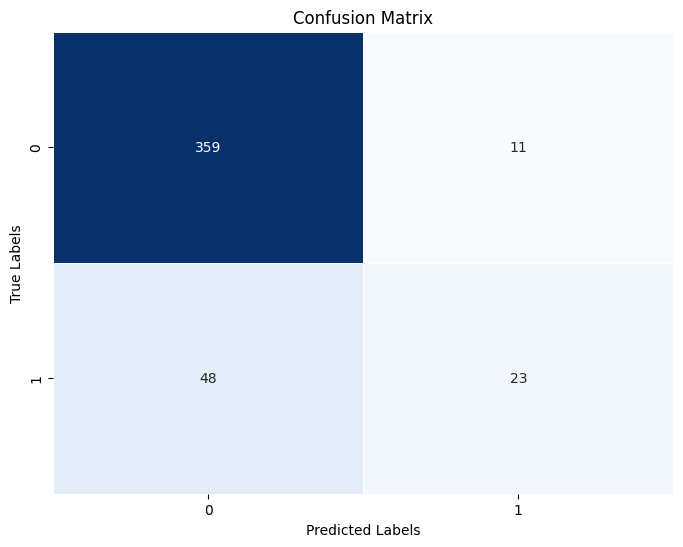



AUC-ROC Score: 0.8120669965740388




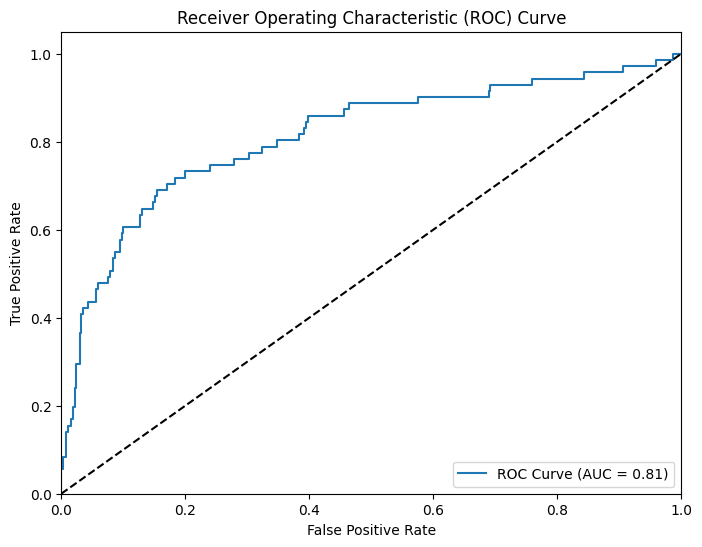



Classifier: Decision Tree


Accuracy: 0.800453514739229
Precision: 0.38666666666666666
Recall: 0.4084507042253521
F1-Score: 0.3972602739726027
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       370
           1       0.39      0.41      0.40        71

    accuracy                           0.80       441
   macro avg       0.64      0.64      0.64       441
weighted avg       0.80      0.80      0.80       441



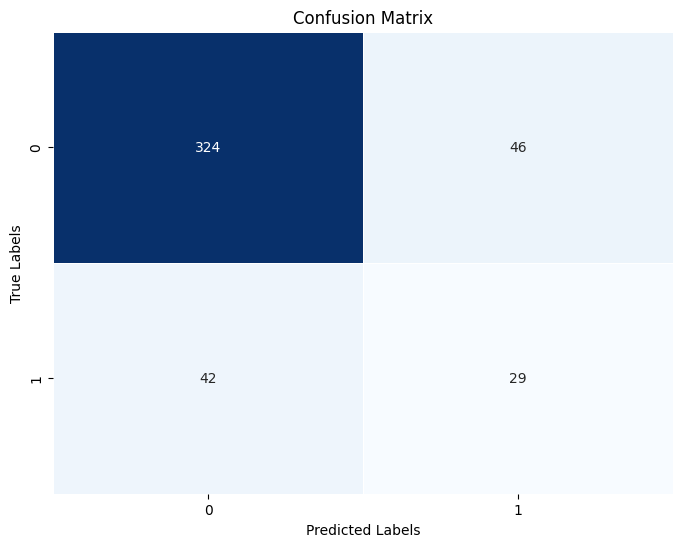



AUC-ROC Score: 0.6396650171298058




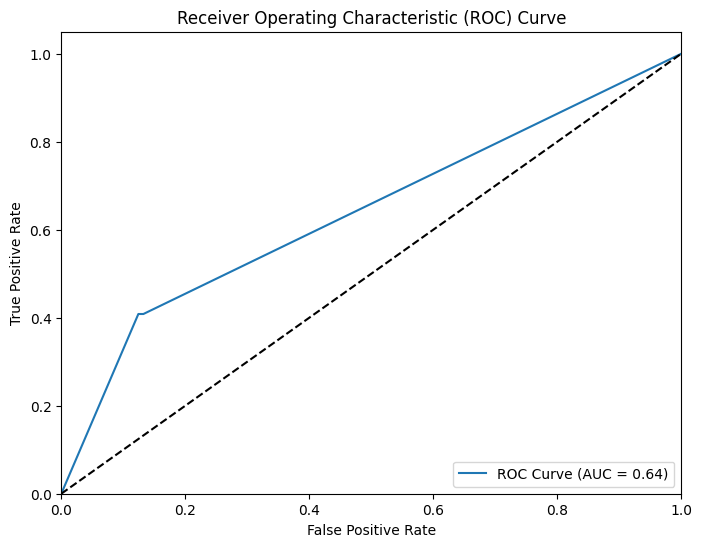



Classifier: XGBoost


Accuracy: 0.8344671201814059
Precision: 0.48148148148148145
Recall: 0.36619718309859156
F1-Score: 0.416
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       370
           1       0.48      0.37      0.42        71

    accuracy                           0.83       441
   macro avg       0.68      0.65      0.66       441
weighted avg       0.82      0.83      0.83       441



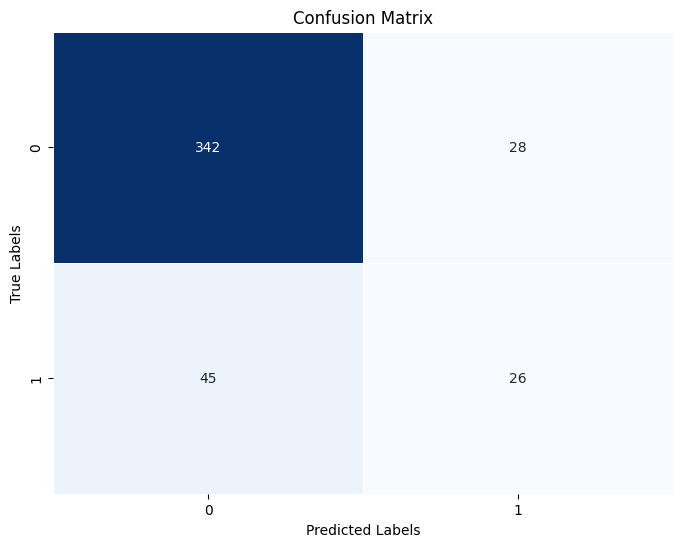



AUC-ROC Score: 0.8107346783403122




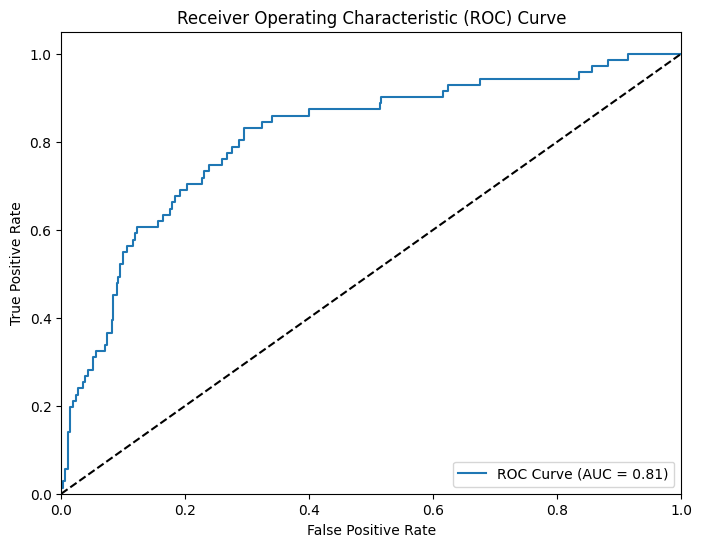

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classifier: Random Forest


Accuracy: 0.8480725623582767
Precision: 0.5555555555555556
Recall: 0.28169014084507044
F1-Score: 0.37383177570093457
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       370
           1       0.56      0.28      0.37        71

    accuracy                           0.85       441
   macro avg       0.71      0.62      0.64       441
weighted avg       0.82      0.85      0.83       441



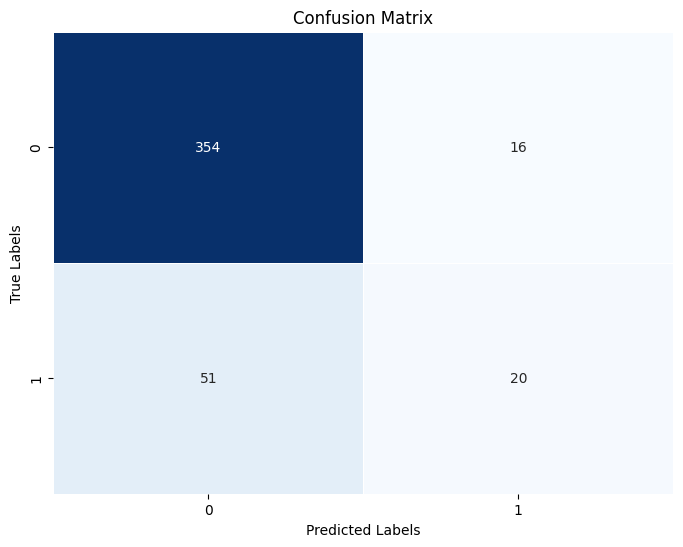



AUC-ROC Score: 0.7954510848877048




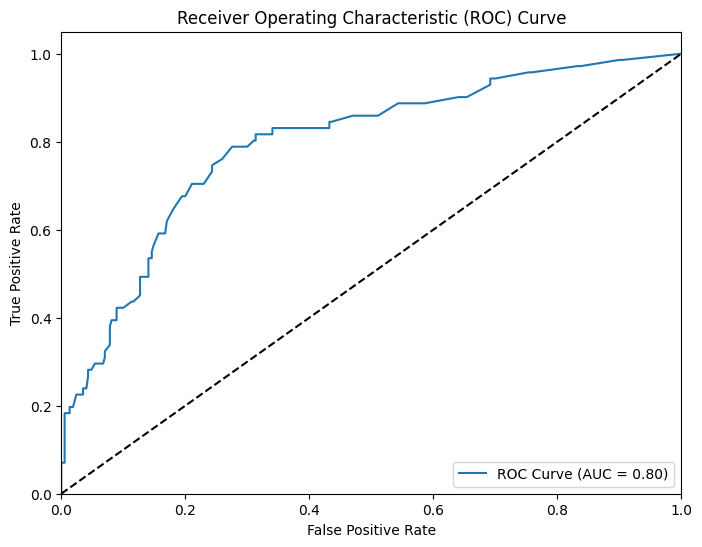

In [88]:
# Define a function for training and evaluating a classifier
def train_evaluate_classifier(classifier, classifier_name):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', classifier)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\033[1mClassifier: {classifier_name}\033[0m")  # Print the classifier name in bold
    print('\n')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    # Display the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')

    # Calculate the AUC-ROC Score
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC Score: {roc_auc}")
    print('\n')

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print('\n')

# List of classifiers to test along with their names
classifiers_to_test = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (XGBClassifier(), "XGBoost"),
    (RandomForestClassifier(), "Random Forest")
]

# Loop through the classifiers and evaluate them
for classifier, classifier_name in classifiers_to_test:
    train_evaluate_classifier(classifier, classifier_name)

In [77]:
# Building a pipeline with the champion model - Logistic Regression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=0))
])

pipeline.fit(X_train, y_train)

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'OverTime']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus'])])),
                ('model', LogisticRegression(random_state=0))])

In [78]:
df_copy_rfe.columns

Index(['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'OverTime', 'BusinessTravel', 'EducationField',
       'JobRole', 'MaritalStatus'],
      dtype='object')

In [79]:
# Create a DataFrame with the new data for prediction
sample_data = pd.DataFrame({
    'EnvironmentSatisfaction': [3],   # Corresponds to 'EnvironmentSatisfaction' column
    'JobInvolvement': [2],            # Corresponds to 'JobInvolvement' column
    'JobLevel': [2],                  # Corresponds to 'JobLevel' column
    'JobSatisfaction': [2],           # Corresponds to 'JobSatisfaction' column
    'OverTime': [0],                  # Corresponds to 'OverTime' column (assuming 1 means 'Yes')
    'BusinessTravel': ['Travel_Frequently'],  # Corresponds to 'BusinessTravel' column
    'EducationField': ['Life Sciences'],  # Corresponds to 'EducationField' column
    'JobRole': ['Research Scientist'],       # Corresponds to 'JobRole' column
    'MaritalStatus': ['Married']           # Corresponds to 'MaritalStatus' column
})

predicted_label = pipeline.predict(sample_data)

# Display the result
if predicted_label[0] == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")


An Employee may stay with the organization


In [80]:
joblib.dump(pipeline, '../models/dataset-2_model_lr.pkl')

['../models/dataset-2_model_lr.pkl']

# Result

***The champion model is LogisticRegression.***
*Out of 441 employees in the test set, the algorithm:*
* correctly classified 23 churned employees (True Positivies) while getting 11 wrong (Type I errors), and 
* correctly classified 359 stayed employees (True Negatives) while getting 48 wrong (Type II errors)